Accents removed and saved to drivers_cleaned.csv
Processing year: 1983
Processing year: 1984
Processing year: 1985
Processing year: 1986
Processing year: 1987
Processing year: 1988
Processing year: 1989
Processing year: 1990
Processing year: 1991
Processing year: 1992
Processing year: 1993
Processing year: 1994
Processing year: 1995
Processing year: 1996
Processing year: 1997
Processing year: 1998
Processing year: 1999
Processing year: 2000
Processing year: 2001
Processing year: 2002
Processing year: 2003
Processing year: 2004
Processing year: 2005
Processing year: 2006
Processing year: 2007
Processing year: 2008
Processing year: 2009
Processing year: 2010
Processing year: 2011
Processing year: 2012
Processing year: 2013
Processing year: 2014
Processing year: 2015
Processing year: 2016
Processing year: 2017
Processing year: 2018
Processing year: 2019
Processing year: 2020
Processing year: 2021
Processing year: 2022
Processing year: 2023
Unmatched race names:
Empty DataFrame
Columns: [R

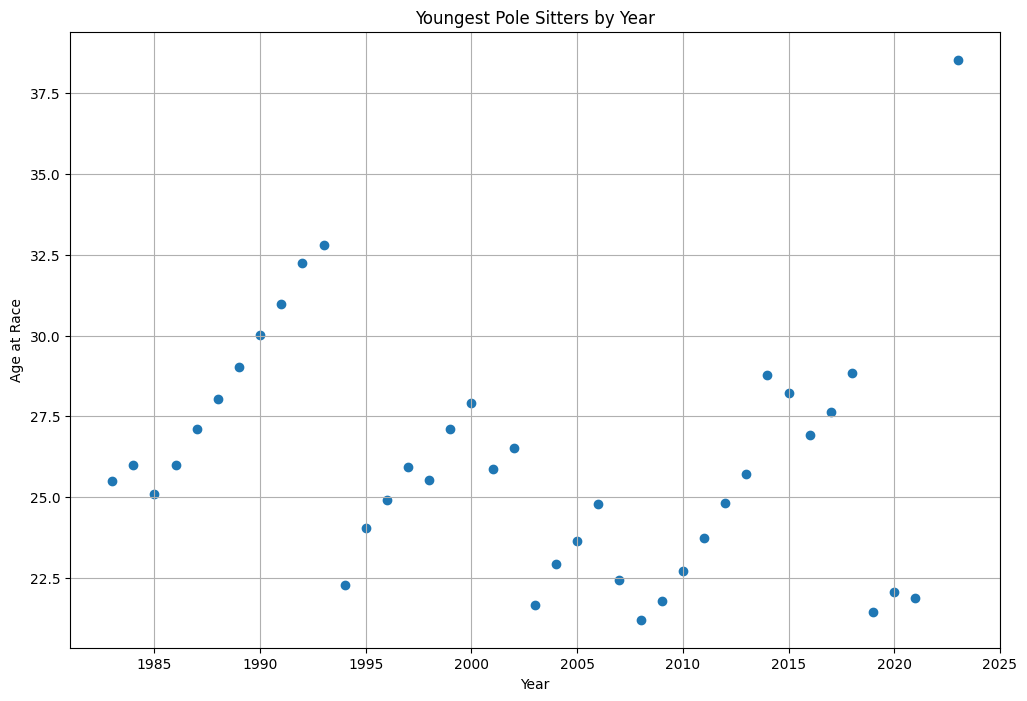

[{"Year":1983,"Driver":"Elio de Angelis","Race":"europe","race_date":"1983-09-25T00:00:00.000","age_at_race":25.5003422313,"forename":"Elio","surname":"de Angelis"},{"Year":1984,"Driver":"Elio de Angelis","Race":"brazil","race_date":"1984-03-25T00:00:00.000","age_at_race":25.9986310746,"forename":"Elio","surname":"de Angelis"},{"Year":1985,"Driver":"Ayrton Senna","Race":"portugal","race_date":"1985-04-21T00:00:00.000","age_at_race":25.0841889117,"forename":"Ayrton","surname":"Senna"},{"Year":1986,"Driver":"Ayrton Senna","Race":"brazil","race_date":"1986-03-23T00:00:00.000","age_at_race":26.0041067762,"forename":"Ayrton","surname":"Senna"},{"Year":1987,"Driver":"Ayrton Senna","Race":"san marino","race_date":"1987-05-03T00:00:00.000","age_at_race":27.1156741958,"forename":"Ayrton","surname":"Senna"},{"Year":1988,"Driver":"Ayrton Senna","Race":"brazil","race_date":"1988-04-03T00:00:00.000","age_at_race":28.0355920602,"forename":"Ayrton","surname":"Senna"},{"Year":1989,"Driver":"Ayrton Sen

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import glob
import logging
import csv
from unidecode import unidecode

# Function to remove accents from a string
def remove_accents(input_str):
    return unidecode(input_str)

# Read the original drivers CSV file and remove accents
with open('./f1-1950-2023/drivers.csv', mode='r', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    rows = list(reader)

# Remove accents from all fields in the CSV
cleaned_rows = []
for row in rows:
    cleaned_row = [remove_accents(field) if field != '\\N' else field for field in row]
    cleaned_rows.append(cleaned_row)

# Write the cleaned data to a new CSV file
with open('./f1-1950-2023/drivers_cleaned.csv', mode='w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(cleaned_rows)

print("Accents removed and saved to drivers_cleaned.csv")

# Now, continue with the rest of the code using the cleaned drivers CSV
# Setup logging
logging.basicConfig(filename='./missing_data.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Load drivers and races data
drivers_df = pd.read_csv('./f1-1950-2023/drivers_cleaned.csv')
races_df = pd.read_csv('./f1-1950-2023/races.csv')

# Define the qualifying results directory
qualifying_results_dir = './f1-data-2/'

# Create a comprehensive mapping from short race names to full race names
race_name_mapping = {
    'austria': 'Austrian Grand Prix',
    'belgium': 'Belgian Grand Prix',
    'italy': 'Italian Grand Prix',
    'spain': 'Spanish Grand Prix',
    'portugal': 'Portuguese Grand Prix',
    'turkey': 'Turkish Grand Prix',
    'great-britain': 'British Grand Prix',
    'hungary': 'Hungarian Grand Prix',
    'bahrain': 'Bahrain Grand Prix',
    'eifel': 'Eifel Grand Prix',
    'abu dhabi': 'Abu Dhabi Grand Prix',
    'abu-dhabi': 'Abu Dhabi Grand Prix',
    'sakhir': 'Sakhir Grand Prix',
    '70th-anniversary': '70th Anniversary Grand Prix',
    '70th anniversary': '70th Anniversary Grand Prix',
    'emilia-romagna': 'Emilia Romagna Grand Prix',
    'emilia romagna': 'Emilia Romagna Grand Prix',
    'styrian': 'Styrian Grand Prix',
    'styria': 'Styrian Grand Prix',
    'tuscany': 'Tuscan Grand Prix',
    'russia': 'Russian Grand Prix',
    'france': 'French Grand Prix',
    'germany': 'German Grand Prix',
    'netherlands': 'Dutch Grand Prix',
    'japan': 'Japanese Grand Prix',
    'australia': 'Australian Grand Prix',
    'brazil': 'Brazilian Grand Prix',
    'canada': 'Canadian Grand Prix',
    'china': 'Chinese Grand Prix',
    'usa': 'United States Grand Prix',
    'mexico': 'Mexican Grand Prix',
    'mexico-city': 'Mexico City Grand Prix',
    'mexico city': 'Mexico City Grand Prix',
    'monaco': 'Monaco Grand Prix',
    'singapore': 'Singapore Grand Prix',
    'korea': 'Korean Grand Prix',
    'malaysia': 'Malaysian Grand Prix',
    'indianapolis': 'Indianapolis Grand Prix',
    'san marino': 'San Marino Grand Prix',
    'san-marino': 'San Marino Grand Prix',
    'europe': 'European Grand Prix',
    'pacific': 'Pacific Grand Prix',
    'detroit': 'Detroit Grand Prix',
    'south-africa': 'South African Grand Prix',
    'usa-west': 'United States Grand Prix West',
    'south africa': 'South African Grand Prix',
    'dallas': 'Dallas Grand Prix',
    'great britain': 'British Grand Prix',
    'united states': 'United States Grand Prix',
    'usa west': 'United States Grand Prix West',
    'india': 'Indian Grand Prix',
    'south korea': 'Korean Grand Prix',
    'qatar': 'Qatar Grand Prix',
    'saudi arabia': 'Saudi Arabian Grand Prix',
    'luxembourg': 'Luxembourg Grand Prix',
    'argentina': 'Argentine Grand Prix',
    'azerbaijan': 'Azerbaijan Grand Prix',
    'miami': 'Miami Grand Prix',
    'las vegas': 'Las Vegas Grand Prix',
    'las-vegas': 'Las Vegas Grand Prix',
    'sao paulo': 'Sao Paulo Grand Prix'
}

# Initialize an empty DataFrame to hold all qualifying results
qualifying_results_df = pd.DataFrame()


for year in range(1983, 2024):
    print(f"Processing year: {year}")
    qualifying_files = glob.glob(f'./f1-data-2/{year}/Qualifying Results/*_qualifying_results.csv')
    num_races_year = races_df[races_df['year'] == year].shape[0]
    num_qualifying_files_year = len(qualifying_files)

    if num_qualifying_files_year != num_races_year:
        logging.info(f"Year {year}: Expected {num_races_year} qualifying files, found {num_qualifying_files_year}")

    for file in qualifying_files:
        try:
            temp_df = pd.read_csv(file)
            race_name = file.split('/')[-1].replace('_qualifying_results.csv', '').replace('-', ' ')
            temp_df['Race'] = race_name
            temp_df['Year'] = year
            qualifying_results_df = pd.concat([qualifying_results_df, temp_df])
        except Exception as e:
            logging.info(f"Failed to read file {file}: {e}")

# Extract forename and surname from the qualifying results
qualifying_results_df[['Driver Forename', 'Driver Surname']] = qualifying_results_df['Driver'].str.split(pat=' ', n=1, expand=True)
# Filter only the pole sitters (Position 1)
pole_sitters_df = qualifying_results_df[qualifying_results_df['Position'].astype(str) == "1"].copy()

# Merge with drivers data on both forename and surname
pole_sitters_df = pole_sitters_df.merge(drivers_df, left_on=['Driver Forename', 'Driver Surname'], right_on=['forename', 'surname'], how='left')
missing_drivers = pole_sitters_df[pole_sitters_df['driverId'].isnull()]
if not missing_drivers.empty:
    logging.info(f"Missing drivers data: {missing_drivers[['Driver', 'Race', 'Year']].to_dict(orient='records')}")

def map_race_name(race):
    mapped_name = race_name_mapping.get(race.lower(), race)
    if mapped_name == race:
        logging.info(f"Race name '{race}' was not matched. Using original name.")
    return mapped_name

pole_sitters_df['Full Race Name'] = pole_sitters_df['Race'].apply(map_race_name)

# Log the unmatched races
missing_races = pole_sitters_df[pole_sitters_df['Full Race Name'] == pole_sitters_df['Race']]
if not missing_races.empty:
    logging.info(f"Unmatched race names: {missing_races[['Race', 'Year']].to_dict(orient='records')}")

# Print the unmatched races for immediate debugging
print("Unmatched race names:")
print(missing_races[['Race', 'Year']])
# Merge with races data using the full race names

pole_sitters_df = pole_sitters_df.merge(races_df, left_on=['Full Race Name', 'Year'], right_on=['name', 'year'], how='left')
missing_race_data = pole_sitters_df[pole_sitters_df['raceId'].isnull()]
if not missing_race_data.empty:
    logging.info(f"Missing race data: {missing_race_data[['Race', 'Full Race Name', 'Year']].to_dict(orient='records')}")

# Calculate the age of each pole sitter at the time of the race using the correct date column
pole_sitters_df['race_date'] = pd.to_datetime(pole_sitters_df['date'])
pole_sitters_df['dob'] = pd.to_datetime(pole_sitters_df['dob'])
pole_sitters_df['age_at_race'] = (pole_sitters_df['race_date'] - pole_sitters_df['dob']).dt.days / 365.25

# Identify the youngest pole sitter each year
youngest_pole_sitters_df = pole_sitters_df.loc[pole_sitters_df.groupby('Year')['age_at_race'].idxmin()]

# Select relevant columns for plotting and exporting
relevant_columns = ['Year', 'Driver', 'Race', 'race_date', 'age_at_race', 'forename', 'surname']
youngest_pole_sitters_relevant_df = youngest_pole_sitters_df[relevant_columns]

# Plot the data
plt.figure(figsize=(12, 8))
plt.scatter(youngest_pole_sitters_relevant_df['Year'], youngest_pole_sitters_relevant_df['age_at_race'])
plt.xlabel('Year')
plt.ylabel('Age at Race')
plt.title('Youngest Pole Sitters by Year')
plt.grid(True)
plt.show()

# Export to JSON
results_json = youngest_pole_sitters_relevant_df.to_json(orient='records', date_format='iso')
with open('./youngest_pole_sitters_1982_2022.json', 'w') as f:
    f.write(results_json)

print(results_json)

Processing year: 2016
num files 21
adding race to year (race=malaysia, year=2016)
adding race to year (race=spain, year=2016)
adding race to year (race=abu dhabi, year=2016)
adding race to year (race=australia, year=2016)
adding race to year (race=austria, year=2016)
adding race to year (race=hungary, year=2016)
adding race to year (race=europe, year=2016)
adding race to year (race=canada, year=2016)
adding race to year (race=belgium, year=2016)
adding race to year (race=bahrain, year=2016)
adding race to year (race=mexico, year=2016)
adding race to year (race=singapore, year=2016)
adding race to year (race=japan, year=2016)
adding race to year (race=germany, year=2016)
adding race to year (race=china, year=2016)
adding race to year (race=united states, year=2016)
adding race to year (race=monaco, year=2016)
adding race to year (race=brazil, year=2016)
adding race to year (race=italy, year=2016)
adding race to year (race=russia, year=2016)
adding race to year (race=great britain, year=

In [36]:
qualifying_results_df[(qualifying_results_df["Year"] == 2023) & (qualifying_results_df["Position"] == 1)]

,Position,Driver Number,Driver,Driver Abbreviation,Car,Time,Race,Year,Laps,Q1,Q2,Q3,Driver Forename,Driver Surname
0,1.0,NaN,Max Verstappen,NaN,NaN,NaN,spain,2023,NaN,NaN,NaN,NaN,Max,Verstappen
0,1.0,NaN,Max Verstappen,NaN,NaN,NaN,abu dhabi,2023,NaN,NaN,NaN,NaN,Max,Verstappen
0,1.0,NaN,Max Verstappen,NaN,NaN,NaN,australia,2023,NaN,NaN,NaN,NaN,Max,Verstappen
0,1.0,NaN,Max Verstappen,NaN,NaN,NaN,qatar,2023,NaN,NaN,NaN,NaN,Max,Verstappen
1,1.0,NaN,Charles Leclerc,NaN,NaN,NaN,las vegas,2023,NaN,NaN,NaN,NaN,Charles,Leclerc
0,1.0,NaN,Max Verstappen,NaN,NaN,NaN,austria,2023,NaN,NaN,NaN,NaN,Max,Verstappen
3,1,NaN,Lewis Hamilton,NaN,NaN,NaN,hungary,2023,NaN,NaN,NaN,NaN,Lewis,Hamilton
1,1.0,NaN,Charles Leclerc,NaN,NaN,NaN,usa,2023,NaN,NaN,NaN,NaN,Charles,Leclerc
0,1.0,NaN,Max Verstappen,NaN,NaN,NaN,canada,2023,NaN,NaN,NaN,NaN,Max,Verstappen
1,1.0,NaN,Charles Leclerc,NaN,NaN,NaN,mexico city,2023,NaN,NaN,NaN,NaN,Charles,Leclerc


In [37]:
pole_sitters_df

,Position,Driver Number,Driver,Driver Abbreviation,Car,Time,Race,Year,Laps,Q1,...,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,race_date,age_at_race
0,1,15.0,Alain Prost,PRO,Renault,1:36.672,france,1983,NaN,NaN,...,\N,\N,\N,\N,\N,\N,\N,\N,1983-04-17,28.142368
1,1,27.0,Patrick Tambay,TAM,Ferrari,1:29.871,austria,1983,NaN,NaN,...,\N,\N,\N,\N,\N,\N,\N,\N,1983-08-14,34.135524
2,1,11.0,Elio de Angelis,DEA,Lotus Renault,1:12.092,europe,1983,NaN,NaN,...,\N,\N,\N,\N,\N,\N,\N,\N,1983-09-25,25.500342
3,1,27.0,Patrick Tambay,TAM,Ferrari,1:26.117,usa west,1983,NaN,NaN,...,\N,\N,\N,\N,\N,\N,\N,\N,1983-03-27,33.752225
4,1,28.0,Rene Arnoux,ARN,Ferrari,1:28.729,canada,1983,NaN,NaN,...,\N,\N,\N,\N,\N,\N,\N,\N,1983-06-12,34.937714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,1,44.0,Lewis Hamilton,HAM,Mercedes,NaN,saudi arabia,2021,23.0,1:28.466,...,2021-12-03,\N,2021-12-04,\N,2021-12-04,\N,\N,\N,2021-12-05,36.908966
681,1,4.0,Lando Norris,NOR,McLaren Mercedes,NaN,russia,2021,23.0,1:47.238,...,2021-09-24,\N,2021-09-25,\N,2021-09-25,\N,\N,\N,2021-09-26,21.869952
682,1,16.0,Charles Leclerc,LEC,Ferrari,NaN,azerbaijan,2021,19.0,1:42.241,...,2021-06-04,\N,2021-06-05,\N,2021-06-05,\N,\N,\N,2021-06-06,23.638604
683,1,44.0,Lewis Hamilton,HAM,Mercedes,NaN,great britain,2021,23.0,1:26.786,...,2021-07-17,\N,\N,\N,2021-07-16,\N,2021-07-17,\N,2021-07-18,36.525667


In [49]:
pole_sitters_df[pole_sitters_df["Year"] == 2022]

,Position,Driver Number,Driver,Driver Abbreviation,Car,Time,Race,Year,Laps,Q1,...,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,race_date,age_at_race


In [57]:
qualifying_results_df[(qualifying_results_df["Year"] == 2022) & (qualifying_results_df['Position'].astype(str) == "1")]

,Position,Driver Number,Driver,Driver Abbreviation,Car,Time,Race,Year,Laps,Q1,Q2,Q3,Driver Forename,Driver Surname


In [58]:
qualifying_results_df[(qualifying_results_df["Year"] == 2022)]

,Position,Driver Number,Driver,Driver Abbreviation,Car,Time,Race,Year,Laps,Q1,Q2,Q3,Driver Forename,Driver Surname
0,2.0,NaN,Max Verstappen,NaN,NaN,NaN,france,2022,NaN,NaN,NaN,NaN,Max,Verstappen
1,1.0,NaN,Charles Leclerc,NaN,NaN,NaN,france,2022,NaN,NaN,NaN,NaN,Charles,Leclerc
2,9.0,NaN,Carlos Sainz,NaN,NaN,NaN,france,2022,NaN,NaN,NaN,NaN,Carlos,Sainz
3,3.0,NaN,Sergio Perez,NaN,NaN,NaN,france,2022,NaN,NaN,NaN,NaN,Sergio,Perez
4,4.0,NaN,Lewis Hamilton,NaN,NaN,NaN,france,2022,NaN,NaN,NaN,NaN,Lewis,Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,19.0,NaN,Mick Schumacher,NaN,NaN,NaN,great britain,2022,NaN,NaN,NaN,NaN,Mick,Schumacher
18,16.0,NaN,Alexander Albon,NaN,NaN,NaN,great britain,2022,NaN,NaN,NaN,NaN,Alexander,Albon
19,10.0,NaN,Lance Stroll,NaN,NaN,NaN,great britain,2022,NaN,NaN,NaN,NaN,Lance,Stroll
20,NaN,NaN,Nico Hulkenberg,NaN,NaN,NaN,great britain,2022,NaN,NaN,NaN,NaN,Nico,Hulkenberg


,Position,Driver Number,Driver,Driver Abbreviation,Car,Time,Race,Year,Laps,Q1,Q2,Q3,Driver Forename,Driver Surname
0,1,15.0,Alain Prost,PRO,Renault,1:36.672,france,1983,NaN,NaN,NaN,NaN,Alain,Prost
0,1,27.0,Patrick Tambay,TAM,Ferrari,1:29.871,austria,1983,NaN,NaN,NaN,NaN,Patrick,Tambay
0,1,11.0,Elio de Angelis,DEA,Lotus Renault,1:12.092,europe,1983,NaN,NaN,NaN,NaN,Elio,de Angelis
0,1,27.0,Patrick Tambay,TAM,Ferrari,1:26.117,usa west,1983,NaN,NaN,NaN,NaN,Patrick,Tambay
0,1,28.0,Rene Arnoux,ARN,Ferrari,1:28.729,canada,1983,NaN,NaN,NaN,NaN,Rene,Arnoux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,44.0,Lewis Hamilton,HAM,Mercedes,NaN,saudi arabia,2021,23.0,1:28.466,1:27.712,1:27.511,Lewis,Hamilton
0,1,4.0,Lando Norris,NOR,McLaren Mercedes,NaN,russia,2021,23.0,1:47.238,1:45.827,1:41.993,Lando,Norris
0,1,16.0,Charles Leclerc,LEC,Ferrari,NaN,azerbaijan,2021,19.0,1:42.241,1:41.659,1:41.218,Charles,Leclerc
0,1,44.0,Lewis Hamilton,HAM,Mercedes,NaN,great britain,2021,23.0,1:26.786,1:26.023,1:26.134,Lewis,Hamilton


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import glob
import logging
import csv
from unidecode import unidecode

# Function to remove accents from a string
def remove_accents(input_str):
    return unidecode(input_str)

# Read the original drivers CSV file and remove accents
with open('./f1-1950-2023/drivers.csv', mode='r', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    rows = list(reader)

# Remove accents from all fields in the CSV
cleaned_rows = []
for row in rows:
    cleaned_row = [remove_accents(field) if field != '\\N' else field for field in row]
    cleaned_rows.append(cleaned_row)

# Write the cleaned data to a new CSV file
with open('./f1-1950-2023/drivers_cleaned.csv', mode='w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(cleaned_rows)

print("Accents removed and saved to drivers_cleaned.csv")

# Now, continue with the rest of the code using the cleaned drivers CSV
# Setup logging
logging.basicConfig(filename='./missing_data.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Load drivers and races data
drivers_df = pd.read_csv('./f1-1950-2023/drivers_cleaned.csv')
races_df = pd.read_csv('./f1-1950-2023/races.csv')

# Define the qualifying results directory
qualifying_results_dir = './f1-data-2/'

# Create a comprehensive mapping from short race names to full race names
race_name_mapping = {
    'austria': 'Austrian Grand Prix',
    'belgium': 'Belgian Grand Prix',
    'italy': 'Italian Grand Prix',
    'spain': 'Spanish Grand Prix',
    'portugal': 'Portuguese Grand Prix',
    'turkey': 'Turkish Grand Prix',
    'great-britain': 'British Grand Prix',
    'hungary': 'Hungarian Grand Prix',
    'bahrain': 'Bahrain Grand Prix',
    'eifel': 'Eifel Grand Prix',
    'abu dhabi': 'Abu Dhabi Grand Prix',
    'abu-dhabi': 'Abu Dhabi Grand Prix',
    'sakhir': 'Sakhir Grand Prix',
    '70th-anniversary': '70th Anniversary Grand Prix',
    '70th anniversary': '70th Anniversary Grand Prix',
    'emilia-romagna': 'Emilia Romagna Grand Prix',
    'emilia romagna': 'Emilia Romagna Grand Prix',
    'styrian': 'Styrian Grand Prix',
    'styria': 'Styrian Grand Prix',
    'tuscany': 'Tuscan Grand Prix',
    'russia': 'Russian Grand Prix',
    'france': 'French Grand Prix',
    'germany': 'German Grand Prix',
    'netherlands': 'Dutch Grand Prix',
    'japan': 'Japanese Grand Prix',
    'australia': 'Australian Grand Prix',
    'brazil': 'Brazilian Grand Prix',
    'canada': 'Canadian Grand Prix',
    'china': 'Chinese Grand Prix',
    'usa': 'United States Grand Prix',
    'mexico': 'Mexican Grand Prix',
    'mexico-city': 'Mexico City Grand Prix',
    'mexico city': 'Mexico City Grand Prix',
    'monaco': 'Monaco Grand Prix',
    'singapore': 'Singapore Grand Prix',
    'korea': 'Korean Grand Prix',
    'malaysia': 'Malaysian Grand Prix',
    'indianapolis': 'Indianapolis Grand Prix',
    'san marino': 'San Marino Grand Prix',
    'san-marino': 'San Marino Grand Prix',
    'europe': 'European Grand Prix',
    'pacific': 'Pacific Grand Prix',
    'detroit': 'Detroit Grand Prix',
    'south-africa': 'South African Grand Prix',
    'usa-west': 'United States Grand Prix West',
    'south africa': 'South African Grand Prix',
    'dallas': 'Dallas Grand Prix',
    'great britain': 'British Grand Prix',
    'united states': 'United States Grand Prix',
    'usa west': 'United States Grand Prix West',
    'india': 'Indian Grand Prix',
    'south korea': 'Korean Grand Prix',
    'qatar': 'Qatar Grand Prix',
    'saudi arabia': 'Saudi Arabian Grand Prix',
    'luxembourg': 'Luxembourg Grand Prix',
    'argentina': 'Argentine Grand Prix',
    'azerbaijan': 'Azerbaijan Grand Prix',
    'miami': 'Miami Grand Prix',
    'las vegas': 'Las Vegas Grand Prix',
    'las-vegas': 'Las Vegas Grand Prix',
    'sao paulo': 'Sao Paulo Grand Prix'
}

# Initialize an empty DataFrame to hold all qualifying results
qualifying_results_df = pd.DataFrame()

for year in range(1983, 2024):
    print(f"Processing year: {year}")
    qualifying_files = glob.glob(f'./f1-data-2/{year}/Qualifying Results/*_qualifying_results.csv')
    num_races_year = races_df[races_df['year'] == year].shape[0]
    num_qualifying_files_year = len(qualifying_files)

    if num_qualifying_files_year != num_races_year:
        logging.info(f"Year {year}: Expected {num_races_year} qualifying files, found {num_qualifying_files_year}")

    for file in qualifying_files:
        try:
            temp_df = pd.read_csv(file)
            race_name = file.split('/')[-1].replace('_qualifying_results.csv', '').replace('-', ' ')
            temp_df['Race'] = race_name
            temp_df['Year'] = year
            qualifying_results_df = pd.concat([qualifying_results_df, temp_df])
        except Exception as e:
            logging.info(f"Failed to read file {file}: {e}")

# Extract forename and surname from the qualifying results
qualifying_results_df[['Driver Forename', 'Driver Surname']] = qualifying_results_df['Driver'].str.split(pat=' ', n=1, expand=True)

# Filter only the front row (Positions 1 and 2)
def isPosition(position, target):
    try:
        return int(position) == target
    except (ValueError, TypeError):
        return False
def isFrontRow(position):
    return isPosition(position, 1) or isPosition(position, 2)

front_row_df = qualifying_results_df[qualifying_results_df['Position'].apply(isFrontRow)].copy()

# Merge with drivers data on both forename and surname
front_row_df = front_row_df.merge(drivers_df, left_on=['Driver Forename', 'Driver Surname'], right_on=['forename', 'surname'], how='left')
missing_drivers = front_row_df[front_row_df['driverId'].isnull()]
if not missing_drivers.empty:
    logging.info(f"Missing drivers data: {missing_drivers[['Driver', 'Race', 'Year']].to_dict(orient='records')}")

def map_race_name(race):
    mapped_name = race_name_mapping.get(race.lower(), race)
    if mapped_name == race:
        logging.info(f"Race name '{race}' was not matched. Using original name.")
    return mapped_name

front_row_df['Full Race Name'] = front_row_df['Race'].apply(map_race_name)

# Log the unmatched races
missing_races = front_row_df[front_row_df['Full Race Name'] == front_row_df['Race']]
if not missing_races.empty:
    logging.info(f"Unmatched race names: {missing_races[['Race', 'Year']].to_dict(orient='records')}")

# Print the unmatched races for immediate debugging
print("Unmatched race names:")
print(missing_races[['Race', 'Year']])

# Merge with races data using the full race names
front_row_df = front_row_df.merge(races_df, left_on=['Full Race Name', 'Year'], right_on=['name', 'year'], how='left')
missing_race_data = front_row_df[front_row_df['raceId'].isnull()]
if not missing_race_data.empty:
    logging.info(f"Missing race data: {missing_race_data[['Race', 'Full Race Name', 'Year']].to_dict(orient='records')}")

# Calculate the age of each front row driver at the time of the race using the correct date column
front_row_df['race_date'] = pd.to_datetime(front_row_df['date'])
front_row_df['dob'] = pd.to_datetime(front_row_df['dob'])
front_row_df['age_at_race'] = (front_row_df['race_date'] - front_row_df['dob']).dt.days / 365.25

# Identify the front rows for each race
front_row_df_sorted = front_row_df.sort_values(by=['Year', 'Race', 'Position'])
front_row_pairs = front_row_df_sorted.groupby(['Year', 'Race']).head(2).copy()

# Ensure each race has both pole sitter and P2
valid_front_rows = front_row_pairs.groupby(['Year', 'Race']).filter(lambda x: len(x) == 2)

# Create a structured list for the JSON output
front_rows_list = []
# Continue from where it left off
for (year, race), group in valid_front_rows.groupby(['Year', 'Race']):
    pole_sitter = group[isPosition(group['Position'], 1)].iloc[0]
    p2_driver = group[isPosition(group['Position'], 2)].iloc[0]
    
    front_row_entry = {
        'race': race,
        'year': year,
        'date': pole_sitter['race_date'].strftime('%Y-%m-%d'),
        'pole': {
            'name': f"{pole_sitter['Driver Forename']} {pole_sitter['Driver Surname']}",
            'age': round(pole_sitter['age_at_race'], 2)
        },
        'p2': {
            'name': f"{p2_driver['Driver Forename']} {p2_driver['Driver Surname']}",
            'age': round(p2_driver['age_at_race'], 2)
        }
    }
    
    front_rows_list.append(front_row_entry)

# Export to JSON
with open('./youngest_front_rows.json', 'w') as f:
    json.dump(front_rows_list, f, indent=4)

# Print the resulting list for verification
print(json.dumps(front_rows_list, indent=4))

# Plot the data
combined_ages = [entry['pole']['age'] + entry['p2']['age'] for entry in front_rows_list]
years = [entry['year'] for entry in front_rows_list]

plt.figure(figsize=(12, 8))
plt.scatter(years, combined_ages)
plt.xlabel('Year')
plt.ylabel('Combined Age of Front Row')
plt.title('Youngest Front Rows by Year')
plt.grid(True)
plt.show()

Accents removed and saved to drivers_cleaned.csv
Processing year: 1983
Processing year: 1984
Processing year: 1985
Processing year: 1986
Processing year: 1987
Processing year: 1988
Processing year: 1989
Processing year: 1990
Processing year: 1991
Processing year: 1992
Processing year: 1993
Processing year: 1994
Processing year: 1995
Processing year: 1996
Processing year: 1997
Processing year: 1998
Processing year: 1999
Processing year: 2000
Processing year: 2001
Processing year: 2002
Processing year: 2003
Processing year: 2004
Processing year: 2005
Processing year: 2006
Processing year: 2007
Processing year: 2008
Processing year: 2009
Processing year: 2010
Processing year: 2011
Processing year: 2012
Processing year: 2013
Processing year: 2014
Processing year: 2015
Processing year: 2016
Processing year: 2017
Processing year: 2018
Processing year: 2019
Processing year: 2020
Processing year: 2021
Processing year: 2022
Processing year: 2023
Unmatched race names:
Empty DataFrame
Columns: [R

KeyError: False

In [63]:
valid_front_rows[valid_front_rows["Year"] == 2023]

,Position,Driver Number,Driver,Driver Abbreviation,Car,Time,Race,Year,Laps,Q1,...,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,race_date,age_at_race
1414,1.0,NaN,Max Verstappen,NaN,NaN,NaN,abu dhabi,2023,NaN,NaN,...,2023-11-24,13:00:00,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N,2023-11-26,26.154689
1415,2.0,NaN,Charles Leclerc,NaN,NaN,NaN,abu dhabi,2023,NaN,NaN,...,2023-11-24,13:00:00,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N,2023-11-26,26.110883
1416,1.0,NaN,Max Verstappen,NaN,NaN,NaN,australia,2023,NaN,NaN,...,2023-03-31,05:00:00,2023-04-01,01:30:00,2023-04-01,05:00:00,\N,\N,2023-04-02,25.503080
1417,2.0,NaN,George Russell,NaN,NaN,NaN,australia,2023,NaN,NaN,...,2023-03-31,05:00:00,2023-04-01,01:30:00,2023-04-01,05:00:00,\N,\N,2023-04-02,25.125257
1422,1.0,NaN,Max Verstappen,NaN,NaN,NaN,austria,2023,NaN,NaN,...,2023-07-01,10:30:00,\N,\N,2023-06-30,15:00:00,2023-07-01,14:30:00,2023-07-02,25.752225
1423,2.0,NaN,Charles Leclerc,NaN,NaN,NaN,austria,2023,NaN,NaN,...,2023-07-01,10:30:00,\N,\N,2023-06-30,15:00:00,2023-07-01,14:30:00,2023-07-02,25.708419
1453,1.0,NaN,Charles Leclerc,NaN,NaN,NaN,azerbaijan,2023,NaN,NaN,...,2023-04-29,09:30:00,\N,\N,2023-04-28,13:00:00,2023-04-29,13:30:00,2023-04-30,25.535934
1452,2.0,NaN,Max Verstappen,NaN,NaN,NaN,azerbaijan,2023,NaN,NaN,...,2023-04-29,09:30:00,\N,\N,2023-04-28,13:00:00,2023-04-29,13:30:00,2023-04-30,25.579740
1434,1.0,NaN,Max Verstappen,NaN,NaN,NaN,bahrain,2023,NaN,NaN,...,2023-03-03,15:00:00,2023-03-04,11:30:00,2023-03-04,15:00:00,\N,\N,2023-03-05,25.426420
1435,2.0,NaN,Sergio Perez,NaN,NaN,NaN,bahrain,2023,NaN,NaN,...,2023-03-03,15:00:00,2023-03-04,11:30:00,2023-03-04,15:00:00,\N,\N,2023-03-05,33.103354


In [69]:

for (year, race), group in valid_front_rows.groupby(['Year', 'Race']):
    savedGroup=group
    print(f"1={group[isPosition(group['Position'], 1)]}")

KeyError: False

In [91]:
savedGroup[int(savedGroup["Position"]) == "1"]

TypeError: cannot convert the series to <class 'int'>